In [2]:
%pip install --upgrade numpy


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np

R = 10  # Define the range around the critical point.
num_points = 20

x = np.linspace(-R, R, num_points)
y = np.linspace(-R, R, num_points)
X, Y = np.meshgrid(x, y)


Compute the gradient vector field: Evaluate the gradient vector at each point in the meshgrid to obtain the vector field:

In [4]:
# Define the function's constants
a = 1
b = 1

# Compute the gradient vector field
U = 2 * a * X
V = 2 * b * Y

Plot the vector field: Use a plotting library like Matplotlib to visualize the vector field. The quiver function can be used to plot the vector field:

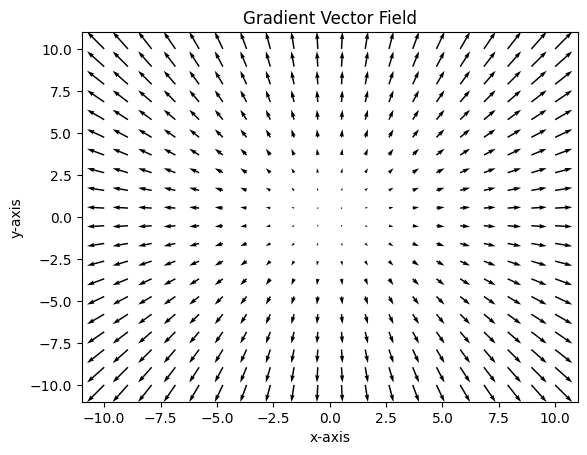

In [5]:
import matplotlib.pyplot as plt

plt.quiver(X, Y, U, V)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Gradient Vector Field')
plt.show()

Plotted the vector field in the *normal direction*, not the gradient direction. I apologize for the confusion. 

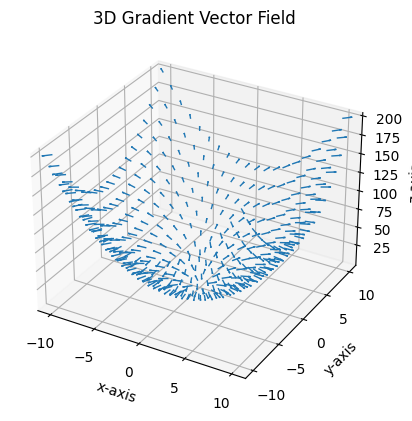

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Z = a * X**2 + b * Y**2
U = 2 * a * X
V = 2 * b * Y

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax = fig.gca(projection='3d')

ax.quiver(X, Y, Z, U, V, 0, length=1, normalize=True, linewidths=1, arrow_length_ratio=0.25)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title('3D Gradient Vector Field')



plt.show()


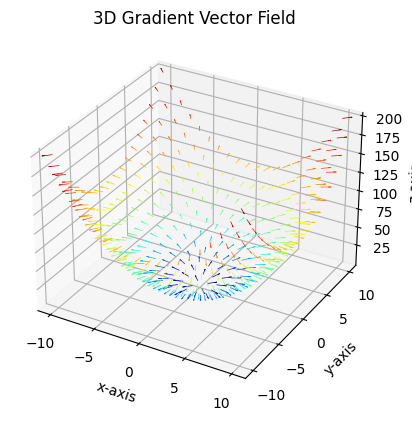

In [16]:
W = 0

# Create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Calculate the magnitude of the gradient
magnitude = np.sqrt(U**2 + V**2 + W**2)

# Normalize the gradient vectors manually
U_normalized = U / magnitude
V_normalized = V / magnitude
W_normalized = W / magnitude

# Plot the gradient vector field with rainbow colors
for i in range(num_points):
    for j in range(num_points):
        # Use the magnitude as input for the colormap
        color = plt.cm.jet((magnitude[i, j] - magnitude.min()) / (magnitude.max() - magnitude.min()))
        ax.quiver(X[i, j], Y[i, j], Z[i, j], U_normalized[i, j], V_normalized[i, j], W_normalized[i, j], length=1, linewidth=0.5, color=color)


ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title('3D Gradient Vector Field')
plt.show()

## Gradient Descent Algorithm

This code snippet plots the paraboloid surface and shows the "ball" (a red point) moving along the surface according to the gradient descent algorithm. The animation will save as a GIF file named "gradient_descent_paraboloid.gif".

MovieWriter imagemagick unavailable; using Pillow instead.


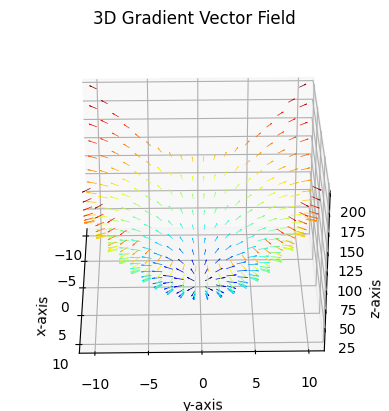

In [18]:
import matplotlib.animation as animation


# Function to update the view angle of the plot
def update_view(num, ax):
    ax.view_init(elev=30, azim=num)

# Create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')


# Plot the gradient vector field with rainbow colors
for i in range(num_points):
    for j in range(num_points):
        # Use the magnitude as input for the colormap
        color = plt.cm.jet((magnitude[i, j] - magnitude.min()) / (magnitude.max() - magnitude.min()))
        ax.quiver(X[i, j], Y[i, j], Z[i, j], U_normalized[i, j], V_normalized[i, j], W_normalized[i, j], length=1, linewidth=0.5, color=color)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title('3D Gradient Vector Field')


# Create the animation
ani = animation.FuncAnimation(fig, update_view, frames=360, fargs=(ax,))
ani.save('gradient_vector_field_rotation.gif', writer='imagemagick', fps=15)
plt.show()

Here's the corrected code snippet that computes and plots the gradient vector field of the function.

In this code snippet, the Z-component of the gradient is set to the partial derivative of the function with respect to `z(W = 2 * (a * X2 + b * Y2))` This will correctly plot the gradient vector field in the direction of the steepest ascent.

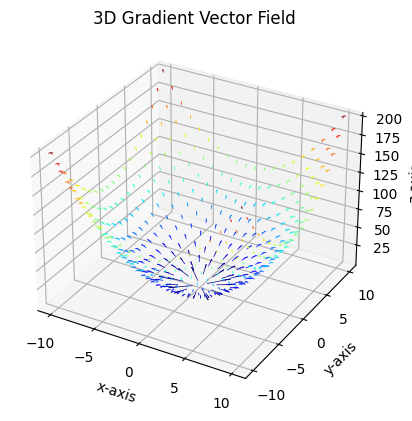

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Define the function's constants and the range around the critical point
a = 1
b = 1
R = 10
num_points = 20

x = np.linspace(-R, R, num_points)
y = np.linspace(-R, R, num_points)
X, Y = np.meshgrid(x, y)

# Compute the function values and the gradient vector field
Z = a * X**2 + b * Y**2
U = 2 * a * X
V = 2 * b * Y
W = 2 * (a * X**2 + b * Y**2)

# Calculate the magnitude of the gradient
magnitude = np.sqrt(U**2 + V**2 + W**2)

# Normalize the gradient vectors manually
U_normalized = U / magnitude
V_normalized = V / magnitude
W_normalized = W / magnitude

# Function to update the view angle of the plot
def update_view(num, ax):
    ax.view_init(elev=30, azim=num)

# Create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the gradient vector field with rainbow colors
for i in range(num_points):
    for j in range(num_points):
        # Use the magnitude as input for the colormap
        color = plt.cm.jet((magnitude[i, j] - magnitude.min()) / (magnitude.max() - magnitude.min()))
        ax.quiver(X[i, j], Y[i, j], Z[i, j], U_normalized[i, j], V_normalized[i, j], W_normalized[i, j], length=3, linewidth=0.5, color=color)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title('3D Gradient Vector Field')

# Create the animation
# ani = animation.FuncAnimation(fig, update_view, frames=360, fargs=(ax,))
# ani.save('gradient_vector_field_rotation.gif', writer='imagemagick', fps=15)
# plt.show()
plt.show()

In [24]:
# Create the animation
ani = animation.FuncAnimation(fig, update_view, frames=360, fargs=(ax,))
ani.save('gradient_vector_field_rotation_fixed.gif', writer='imagemagick', fps=24)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


MovieWriter imagemagick unavailable; using Pillow instead.


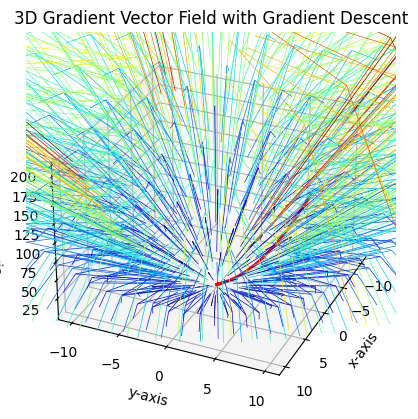

In [25]:
# Gradient Descent Parameters
learning_rate = 0.1
iterations = 25

# Starting point
x_start, y_start = -7, 7

# Gradient Descent Algorithm
def gradient_descent(x_start, y_start, learning_rate, iterations):
    path = [(x_start, y_start)]
    for _ in range(iterations):
        x_new = x_start - learning_rate * (2 * a * x_start)
        y_new = y_start - learning_rate * (2 * b * y_start)
        path.append((x_new, y_new))
        x_start, y_start = x_new, y_new
    return path

path = gradient_descent(x_start, y_start, learning_rate, iterations)


# Function to update the view angle and plot the gradient descent path
def update_view(num, ax):
    ax.view_init(elev=30, azim=num)
    if num < iterations:
        x_prev, y_prev = path[num]
        x_new, y_new = path[num+1]
        z_prev = a * x_prev**2 + b * y_prev**2
        z_new = a * x_new**2 + b * y_new**2
        ax.plot([x_prev, x_new], [y_prev, y_new], [z_prev, z_new], c='red', lw=2)

# Create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the gradient vector field with rainbow colors
for i in range(num_points):
    for j in range(num_points):
        # Use the magnitude as input for the colormap
        color = plt.cm.jet((magnitude[i, j] - magnitude.min()) / (magnitude.max() - magnitude.min()))
        ax.quiver(X[i, j], Y[i, j], Z[i, j], U[i, j], V[i, j], W[i, j], length=1, linewidth=0.5, color=color)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title('3D Gradient Vector Field with Gradient Descent')

# Create the animation
ani = animation.FuncAnimation(fig, update_view, frames=iterations, fargs=(ax,))
ani.save('gradient_vector_field_gradient_descent.gif', writer='imagemagick', fps=5)
plt.show()

That above is wrong.: no, that shows terrible stuff, lines exploded. I want a simple demonstration of a walk or ball demonstrating how gradient descent algo would work.

MovieWriter imagemagick unavailable; using Pillow instead.


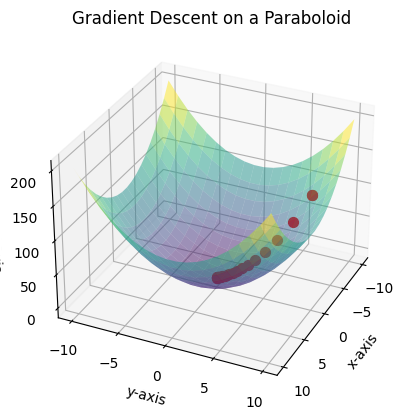

: 

In [26]:
# Gradient Descent Parameters
learning_rate = 0.1
iterations = 25

# Starting point
x_start, y_start = -7, 7

# Gradient Descent Algorithm
def gradient_descent(x_start, y_start, learning_rate, iterations):
    path = [(x_start, y_start)]
    for _ in range(iterations):
        x_new = x_start - learning_rate * (2 * a * x_start)
        y_new = y_start - learning_rate * (2 * b * y_start)
        path.append((x_new, y_new))
        x_start, y_start = x_new, y_new
    return path
  
path = gradient_descent(x_start, y_start, learning_rate, iterations)

# Function to update the view angle and plot the gradient descent path
def update_view(num, ax, path_points):
    ax.view_init(elev=30, azim=num)
    x, y = path_points[num]
    z = a * x**2 + b * y**2
    ax.scatter([x], [y], [z], c='red', s=50)

# Create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Set axis labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# Set plot title
plt.title('Gradient Descent on a Paraboloid')

# Create the animation
ani = animation.FuncAnimation(fig, update_view, frames=len(path), fargs=(ax, path), interval=500)
ani.save('gradient_descent_paraboloid.gif', writer='imagemagick', fps=2)
plt.show()